In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json
import os
import pandas as pd
from PIL import Image
import numpy as np

In [9]:
folder_path_train = '../data/train/'
folder_path_valid = '../data/valid/'

In [10]:
with open('../data/train_annotations', 'r') as file:
    df = pd.read_json(file)

In [11]:
df

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[119, 25, 205, 606]",124230,[],0
1,1,1,1,"[131, 82, 327, 440]",143880,[],0
2,2,2,2,"[225, 298, 198, 185]",36630,[],0
3,3,3,2,"[468, 109, 172, 193]",33196,[],0
4,4,4,1,"[14, 242, 611, 154]",94094,[],0
...,...,...,...,...,...,...,...
495,495,495,2,"[92, 203, 456, 230]",104880,[],0
496,496,496,1,"[229, 359, 144, 131]",18864,[],0
497,497,497,1,"[258, 183, 126, 323]",40698,[],0
498,498,498,1,"[140, 55, 336, 517]",173712,[],0


In [12]:
train_files = os.listdir('../data/train')

In [13]:
train_files

['image_id_000.jpg',
 'image_id_001.jpg',
 'image_id_002.jpg',
 'image_id_003.jpg',
 'image_id_004.jpg',
 'image_id_005.jpg',
 'image_id_006.jpg',
 'image_id_007.jpg',
 'image_id_008.jpg',
 'image_id_009.jpg',
 'image_id_010.jpg',
 'image_id_011.jpg',
 'image_id_012.jpg',
 'image_id_013.jpg',
 'image_id_014.jpg',
 'image_id_015.jpg',
 'image_id_016.jpg',
 'image_id_017.jpg',
 'image_id_018.jpg',
 'image_id_019.jpg',
 'image_id_020.jpg',
 'image_id_021.jpg',
 'image_id_022.jpg',
 'image_id_023.jpg',
 'image_id_024.jpg',
 'image_id_025.jpg',
 'image_id_026.jpg',
 'image_id_027.jpg',
 'image_id_028.jpg',
 'image_id_029.jpg',
 'image_id_030.jpg',
 'image_id_031.jpg',
 'image_id_032.jpg',
 'image_id_033.jpg',
 'image_id_034.jpg',
 'image_id_035.jpg',
 'image_id_036.jpg',
 'image_id_037.jpg',
 'image_id_038.jpg',
 'image_id_039.jpg',
 'image_id_040.jpg',
 'image_id_041.jpg',
 'image_id_042.jpg',
 'image_id_043.jpg',
 'image_id_044.jpg',
 'image_id_045.jpg',
 'image_id_046.jpg',
 'image_id_04

In [14]:
def preprocess_image(image_path, target_size=(224, 224)):
    image = Image.open(image_path)
    image = image.resize(target_size)
    image = np.array(image)
    image = image / 255.0  # Normalize to [0, 1]
    return image

In [15]:
df['filepaths'] = [folder_path_train + file for file in train_files]

In [16]:
df

,id,image_id,category_id,bbox,area,segmentation,iscrowd,filepaths
0,0,0,1,"[119, 25, 205, 606]",124230,[],0,../data/train/image_id_000.jpg
1,1,1,1,"[131, 82, 327, 440]",143880,[],0,../data/train/image_id_001.jpg
2,2,2,2,"[225, 298, 198, 185]",36630,[],0,../data/train/image_id_002.jpg
3,3,3,2,"[468, 109, 172, 193]",33196,[],0,../data/train/image_id_003.jpg
4,4,4,1,"[14, 242, 611, 154]",94094,[],0,../data/train/image_id_004.jpg
...,...,...,...,...,...,...,...,...
495,495,495,2,"[92, 203, 456, 230]",104880,[],0,../data/train/image_id_495.jpg
496,496,496,1,"[229, 359, 144, 131]",18864,[],0,../data/train/image_id_496.jpg
497,497,497,1,"[258, 183, 126, 323]",40698,[],0,../data/train/image_id_497.jpg
498,498,498,1,"[140, 55, 336, 517]",173712,[],0,../data/train/image_id_498.jpg


In [17]:
df['category_id'] = df['category_id'].apply(lambda x: 0 if x == 2 else 1)

In [18]:
df

,id,image_id,category_id,bbox,area,segmentation,iscrowd,filepaths
0,0,0,1,"[119, 25, 205, 606]",124230,[],0,../data/train/image_id_000.jpg
1,1,1,1,"[131, 82, 327, 440]",143880,[],0,../data/train/image_id_001.jpg
2,2,2,0,"[225, 298, 198, 185]",36630,[],0,../data/train/image_id_002.jpg
3,3,3,0,"[468, 109, 172, 193]",33196,[],0,../data/train/image_id_003.jpg
4,4,4,1,"[14, 242, 611, 154]",94094,[],0,../data/train/image_id_004.jpg
...,...,...,...,...,...,...,...,...
495,495,495,0,"[92, 203, 456, 230]",104880,[],0,../data/train/image_id_495.jpg
496,496,496,1,"[229, 359, 144, 131]",18864,[],0,../data/train/image_id_496.jpg
497,497,497,1,"[258, 183, 126, 323]",40698,[],0,../data/train/image_id_497.jpg
498,498,498,1,"[140, 55, 336, 517]",173712,[],0,../data/train/image_id_498.jpg


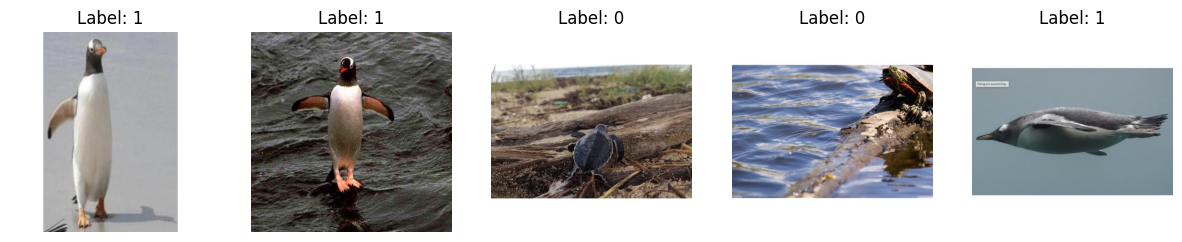

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Assuming your DataFrame is named 'df' and it has 'file_path' and 'adjusted_labels' columns

# Function to display images with labels from file paths
def display_images_from_paths(dataframe, num_images=5):
    plt.figure(figsize=(15, 7))

    for i in range(num_images):
        file_path = dataframe.iloc[i]['filepaths']
        label = dataframe.iloc[i]['category_id']
        image = load_img(file_path)  # Load the image from the file path
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(f'Label: {label}')
        plt.axis('off')

    plt.show()

# Display a few images with their labels
display_images_from_paths(df)

In [20]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Assuming 'df' is your DataFrame and it contains 'file_path' and 'adjusted_labels'

# Load and preprocess images
def load_image(file_path):
    image = load_img(file_path, target_size=(224, 224))
    return img_to_array(image) / 255.0

df['image'] = df['filepaths'].apply(load_image)
images = np.array(df['image'].tolist())
labels = df['category_id'].values

# Split the dataset
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model


# Train the model
#model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
13/13 [==============================] - 12s 639ms/step - loss: 4.4960 - accuracy: 0.4725 - val_loss: 0.6535 - val_accuracy: 0.5600
Epoch 2/10
13/13 [==============================] - 7s 568ms/step - loss: 0.5867 - accuracy: 0.6700 - val_loss: 0.6804 - val_accuracy: 0.6400
Epoch 3/10
13/13 [==============================] - 7s 572ms/step - loss: 0.5244 - accuracy: 0.7550 - val_loss: 0.6650 - val_accuracy: 0.7100
Epoch 4/10
13/13 [==============================] - 7s 575ms/step - loss: 0.4656 - accuracy: 0.8375 - val_loss: 0.6774 - val_accuracy: 0.7800
Epoch 5/10
13/13 [==============================] - 7s 568ms/step - loss: 0.3093 - accuracy: 0.8975 - val_loss: 0.6826 - val_accuracy: 0.7400
Epoch 6/10
13/13 [==============================] - 7s 567ms/step - loss: 0.1874 - accuracy: 0.9250 - val_loss: 0.7226 - val_accuracy: 0.7500
Epoch 7/10
13/13 [==============================] - 7s 569ms/step - loss: 0.1477 - accuracy: 0.9400 - val_loss: 0.8455 - val_accuracy: 0.7200
Epoch

In [23]:
with open('../data/valid_annotations', 'r') as file:
    df_valid = pd.read_json(file)

In [24]:
valid_files = os.listdir('../data/valid')

In [25]:
df_valid['filepaths'] = [folder_path_valid + file for file in valid_files]
df_valid['category_id'] = df_valid['category_id'].apply(lambda x: 0 if x == 2 else 1)

In [26]:
df_valid['image'] = df_valid['filepaths'].apply(load_image)
images_valid = np.array(df_valid['image'].tolist())
labels_valid = df_valid['category_id'].values

In [27]:
loss, accuracy = model.evaluate(images_valid, labels_valid)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

3/3 [==============================] - 0s 67ms/step - loss: 1.3885 - accuracy: 0.7222
Validation Loss: 1.388527750968933
Validation Accuracy: 0.7222222089767456


In [28]:
df[['xmin', 'ymin', 'xmax', 'ymax']] = df['bbox'].apply(lambda x: pd.Series(x))

In [29]:
# Create a new column 'animal' based on the 'category' column
df['animal'] = df['category_id'].apply(lambda x: 'penguin' if x == 1 else 'turtle')


In [30]:
df

,id,image_id,category_id,bbox,area,segmentation,iscrowd,filepaths,image,xmin,ymin,xmax,ymax,animal
0,0,0,1,"[119, 25, 205, 606]",124230,[],0,../data/train/image_id_000.jpg,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",119,25,205,606,penguin
1,1,1,1,"[131, 82, 327, 440]",143880,[],0,../data/train/image_id_001.jpg,"[[[0.3647059, 0.3647059, 0.3647059], [0.364705...",131,82,327,440,penguin
2,2,2,0,"[225, 298, 198, 185]",36630,[],0,../data/train/image_id_002.jpg,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",225,298,198,185,turtle
3,3,3,0,"[468, 109, 172, 193]",33196,[],0,../data/train/image_id_003.jpg,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",468,109,172,193,turtle
4,4,4,1,"[14, 242, 611, 154]",94094,[],0,../data/train/image_id_004.jpg,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",14,242,611,154,penguin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,495,0,"[92, 203, 456, 230]",104880,[],0,../data/train/image_id_495.jpg,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",92,203,456,230,turtle
496,496,496,1,"[229, 359, 144, 131]",18864,[],0,../data/train/image_id_496.jpg,"[[[0.3647059, 0.39607844, 0.47058824], [0.3686...",229,359,144,131,penguin
497,497,497,1,"[258, 183, 126, 323]",40698,[],0,../data/train/image_id_497.jpg,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",258,183,126,323,penguin
498,498,498,1,"[140, 55, 336, 517]",173712,[],0,../data/train/image_id_498.jpg,"[[[0.99607843, 1.0, 1.0], [0.99607843, 1.0, 1....",140,55,336,517,penguin


In [42]:
train_dir_path = '../train_dir'
val_dir_path = '../val_dir'

In [43]:
os.makedirs(train_dir_path, exist_ok=True)
os.makedirs(val_dir_path, exist_ok=True)

In [45]:
import shutil
import os

# Replace this with the path of your initial training directory


# Iterate over all files in the initial training directory
for filename in os.listdir(folder_path_train):
    if filename.endswith('.jpg'):  # Add other image formats if necessary
        # Construct the full file path
        file_path = os.path.join(folder_path_train, filename)
        # Copy the file to the new training directory
        shutil.copy(file_path, train_dir_path)


In [47]:
for filename in os.listdir(folder_path_valid):
    if filename.endswith('.jpg'):  # Add other image formats if necessary
        # Construct the full file path
        file_path = os.path.join(folder_path_valid, filename)
        # Copy the file to the new training directory
        shutil.copy(file_path, val_dir_path)

In [50]:
import os
from PIL import Image

def convert_bbox_to_yolo(df, img_width, img_height):
    """
    Convert bbox coordinates to YOLO format.
    YOLO format: [x_center, y_center, width, height], normalized by image size.
    """
    x_min, y_min, width, height = row['bbox']
    x_center = (x_min + width / 2) / img_width
    y_center = (y_min + height / 2) / img_height
    width /= img_width
    height /= img_height
    return [df['category_id'], x_center, y_center, width, height]

In [53]:
for _, row in df.iterrows():
    # Read the dimensions of each image
    image_path = row['filepaths']
    with Image.open(image_path) as img:
        img_width, img_height = img.size

    # Convert the bounding box to YOLO format
    yolo_bbox = convert_bbox_to_yolo(row, img_width, img_height)
    yolo_line = ' '.join(map(str, yolo_bbox))

    # Write to the corresponding YOLO annotation file
    yolo_file_path = os.path.join('../train_dir/labels/', f"image_id_{row['image_id']}.txt")
    with open(yolo_file_path, 'a') as file:
        file.write(yolo_line + '\n')